# Proyecto

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

plt.rcParams["figure.figsize"] = (10, 8)

## Analisis exploratorio de datos

In [2]:
encuesta_vivienda = pd.read_csv("endutih_vivienda_anual_2019_enc.csv")

In [3]:
encuesta_vivienda.columns

Index(['energia_electrica', 'refrigerador', 'lavadora', 'auto_propio',
       'personas_vivienda', 'mismo_gasto', 'TLOC', 'ESTRATO', 'material_1',
       'material_2', 'material_3', 'fuente_agua_1', 'fuente_agua_2',
       'fuente_agua_3', 'fuente_agua_4', 'fuente_agua_5', 'fuente_agua_6',
       'conexion_drenaje_1', 'conexion_drenaje_2', 'conexion_drenaje_3',
       'conexion_drenaje_4', 'conexion_drenaje_5', 'tipo_poblacion_R',
       'tipo_poblacion_U'],
      dtype='object')

In [4]:
encuesta_vivienda.shape

(21163, 24)

In [5]:
encuesta_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21163 entries, 0 to 21162
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   energia_electrica   21163 non-null  int64
 1   refrigerador        21163 non-null  int64
 2   lavadora            21163 non-null  int64
 3   auto_propio         21163 non-null  int64
 4   personas_vivienda   21163 non-null  int64
 5   mismo_gasto         21163 non-null  int64
 6   TLOC                21163 non-null  int64
 7   ESTRATO             21163 non-null  int64
 8   material_1          21163 non-null  int64
 9   material_2          21163 non-null  int64
 10  material_3          21163 non-null  int64
 11  fuente_agua_1       21163 non-null  int64
 12  fuente_agua_2       21163 non-null  int64
 13  fuente_agua_3       21163 non-null  int64
 14  fuente_agua_4       21163 non-null  int64
 15  fuente_agua_5       21163 non-null  int64
 16  fuente_agua_6       21163 non-null  int6

### Estadistica descriptiva

In [6]:
encuesta_vivienda.describe()

,energia_electrica,refrigerador,lavadora,auto_propio,personas_vivienda,mismo_gasto,TLOC,ESTRATO,material_1,material_2,...,fuente_agua_4,fuente_agua_5,fuente_agua_6,conexion_drenaje_1,conexion_drenaje_2,conexion_drenaje_3,conexion_drenaje_4,conexion_drenaje_5,tipo_poblacion_R,tipo_poblacion_U
count,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,...,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000,21163.000000
mean,0.992581,0.885271,0.729670,0.482588,3.618863,1.018476,2.412371,2.179228,0.034069,0.524500,...,0.010915,0.025469,0.037707,0.659264,0.288286,0.009120,0.005670,0.037660,0.342674,0.657326
std,0.085813,0.318702,0.444141,0.499709,1.858446,0.134667,1.328592,1.024259,0.181410,0.499411,...,0.103907,0.157548,0.190492,0.473968,0.452976,0.095063,0.075089,0.190377,0.474615,0.474615
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,4.000000,3.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,22.000000,2.000000,4.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Matriz de correlaciones

In [17]:
corr_matrix = encuesta_vivienda.corr(method = "spearman")
corr_matrix

,energia_electrica,refrigerador,lavadora,auto_propio,personas_vivienda,mismo_gasto,TLOC,ESTRATO,material_1,material_2,...,fuente_agua_4,fuente_agua_5,fuente_agua_6,conexion_drenaje_1,conexion_drenaje_2,conexion_drenaje_3,conexion_drenaje_4,conexion_drenaje_5,tipo_poblacion_R,tipo_poblacion_U
energia_electrica,1.000000,0.195225,0.120957,0.042719,0.029200,0.007772,-0.057996,0.073409,-0.174999,0.000382,...,-0.128708,-0.048938,-0.110080,0.091208,-0.023996,0.002501,-0.015472,-0.165125,-0.064046,0.064046
refrigerador,0.195225,1.000000,0.408165,0.252720,0.035673,0.008653,-0.171507,0.249856,-0.192302,-0.168788,...,-0.114868,-0.061325,-0.116324,0.173838,-0.087738,-0.034092,-0.012307,-0.202155,-0.115899,0.115899
lavadora,0.120957,0.408165,1.000000,0.327438,0.086786,0.000552,-0.184596,0.280912,-0.181279,-0.219930,...,-0.100914,-0.065703,-0.103482,0.175463,-0.102341,-0.052408,-0.019214,-0.159582,-0.121404,0.121404
auto_propio,0.042719,0.252720,0.327438,1.000000,0.059538,-0.009614,-0.156913,0.276635,-0.120385,-0.264092,...,-0.055950,-0.043285,-0.087422,0.162793,-0.123852,-0.029981,-0.013740,-0.090215,-0.093391,0.093391
personas_vivienda,0.029200,0.035673,0.086786,0.059538,1.000000,0.137657,0.067238,-0.116302,0.006346,0.081211,...,-0.019020,0.036726,0.014121,-0.031364,0.032944,0.009925,0.000937,-0.005627,0.034724,-0.034724
mismo_gasto,0.007772,0.008653,0.000552,-0.009614,0.137657,1.000000,-0.016059,-0.004147,0.003248,0.013997,...,-0.011036,0.006774,0.002314,0.007572,-0.004431,0.005294,0.003659,-0.012396,-0.026605,0.026605
TLOC,-0.057996,-0.171507,-0.184596,-0.156913,0.067238,-0.016059,1.000000,-0.603650,0.096653,0.376137,...,0.063982,0.048840,0.144731,-0.468469,0.392973,0.063333,0.070381,0.171904,0.872785,-0.872785
ESTRATO,0.073409,0.249856,0.280912,0.276635,-0.116302,-0.004147,-0.603650,1.000000,-0.157016,-0.461398,...,-0.073557,-0.138291,-0.208484,0.505640,-0.416325,-0.078998,-0.052303,-0.208193,-0.473571,0.473571
material_1,-0.174999,-0.192302,-0.181279,-0.120385,0.006346,0.003248,0.096653,-0.157016,1.000000,-0.197244,...,0.057985,0.058921,0.109139,-0.139225,0.080016,0.028565,0.017039,0.135248,0.075153,-0.075153
material_2,0.000382,-0.168788,-0.219930,-0.264092,0.081211,0.013997,0.376137,-0.461398,-0.197244,1.000000,...,0.047207,0.080655,0.093109,-0.255698,0.213487,0.046554,0.016457,0.098893,0.295321,-0.295321


### Visualizaciones

<AxesSubplot:xlabel='ESTRATO', ylabel='Count'>

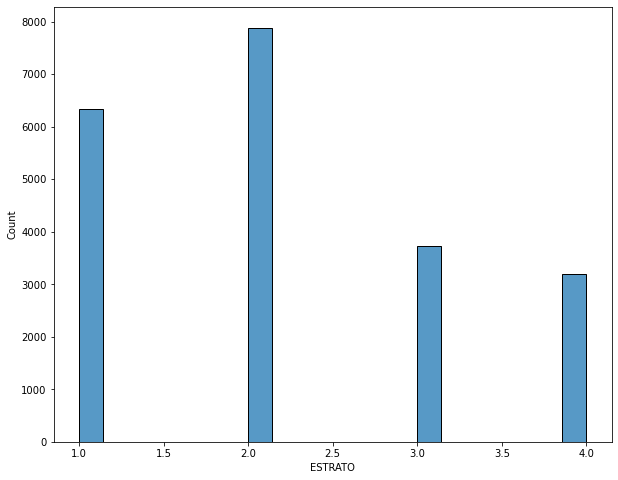

In [12]:
# Distribucion de Estratos socioeconomicos
sns.histplot(encuesta_vivienda["ESTRATO"])

<AxesSubplot:xlabel='TLOC', ylabel='Count'>

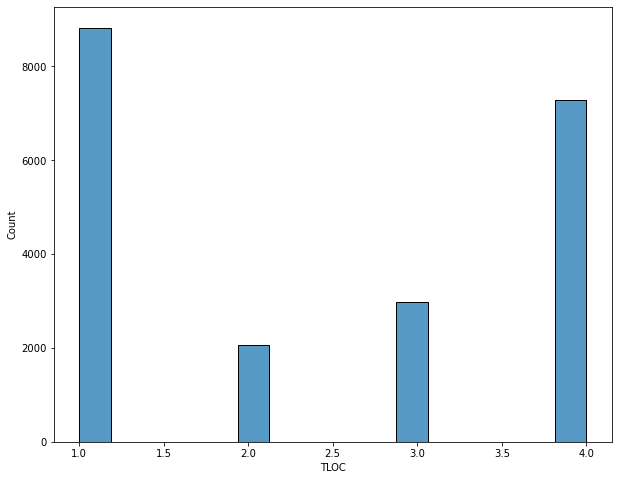

In [13]:
sns.histplot(encuesta_vivienda["TLOC"])

<AxesSubplot:xlabel='TLOC', ylabel='ESTRATO'>

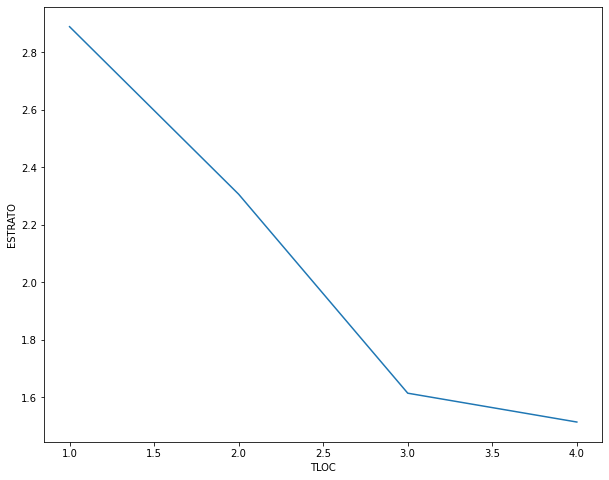

In [14]:
sns.lineplot(data = encuesta_vivienda, x = "TLOC", y = "ESTRATO", ci = None)

<AxesSubplot:>

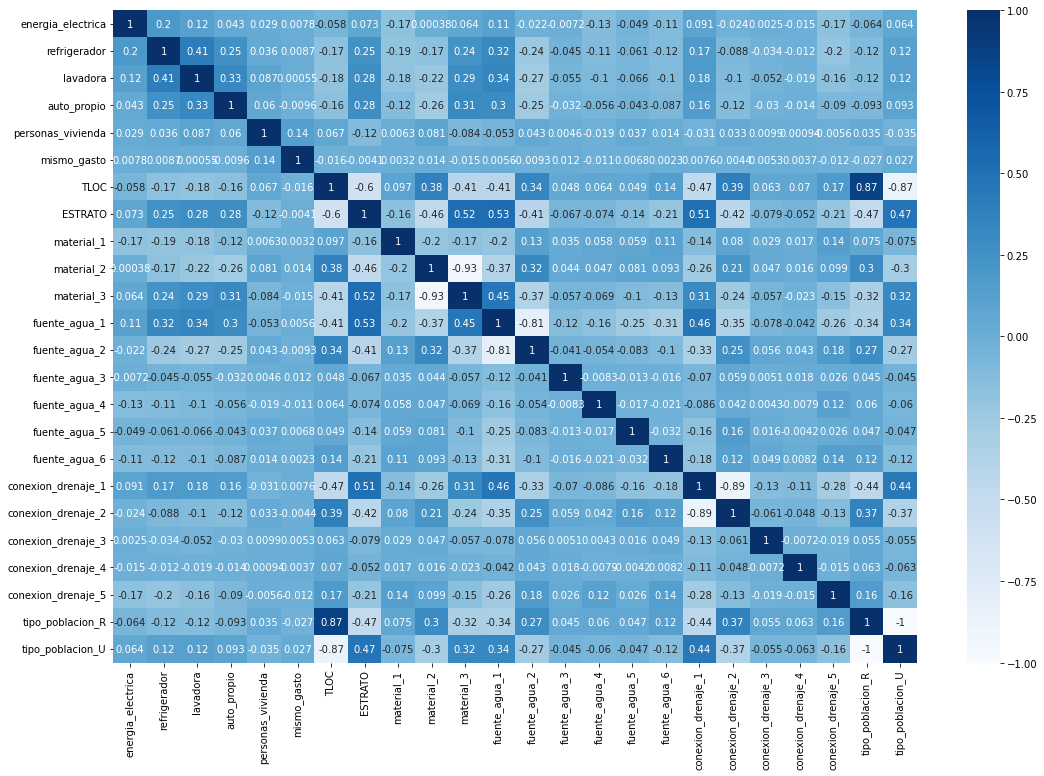

In [15]:
# Heatmap
plt.figure(figsize = (18,12))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")

## Regresion lineal

In [12]:
# Ajuste de datos 
formula = "ESTRATO ~ material_3 + fuente_agua_1 + TLOC + tipo_poblacion_U + conexion_drenaje_1 + refrigerador + lavadora + auto_propio"
modelo_ols = ols(formula, encuesta_vivienda).fit()

In [13]:
# Revisar modelo
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ESTRATO   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     2946.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:21:54   Log-Likelihood:                -22613.
No. Observations:               21163   AIC:                         4.524e+04
Df Residuals:                   21154   BIC:                         4.532e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5500      0.037     69.007      0.000       2.478       2.622
material_3             0.4510      0.012     38.474      0.000       0.428       0.474
fuente_agua_1          0.3126      0.014     22.867      0.000       0.286       0.339
TLOC                  -0.3928      0.008    -50.904      0.000      -0.408      -0.378
tipo_poblacion_U      -0.3539      0.020    -17.308      0.000      -0.394      -0.314
conexion_drenaje_1     0.3507      0.012     28.339      0.000       0.326       0.375
refrigerador           0.0494      0.017      2.886      0.004       0.016       0.083
lavadora               0.0599      0.013      4.730      0.000       0.035       0.085
auto_propio            0.1443      0.011     13.474      0.000       0.123       0.165
==============================================================================
Omnibus:                       27.448   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.410
Skew:                          -0.011   Prob(JB):                     9.17e-08
Kurtosis:                       3.191   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# prediccion modelo. Crear una Serie
Y_pred = pd.Series(modelo_ols.predict())

In [15]:
comparison = pd.concat([encuesta_vivienda["ESTRATO"], Y_pred], keys = ["ESTRATO", "ESTRATO_p"], axis = 1)
comparison

,ESTRATO,ESTRATO_p
0,2,2.515960
1,2,3.026857
2,2,3.171145
3,2,3.026857
4,2,2.466525
...,...,...
21158,2,1.895692
21159,2,1.691472
21160,2,1.751405
21161,2,1.751405


In [16]:
# Crear columnas con errores

def calculate_errors(df):
    df["error"] = df.iloc[0:,0] - df.iloc[0:,1]
    df["sq_error"] = (df["error"])**2
    df["abs_error"] = abs(df["error"])
    
    return df

In [17]:
comparison = calculate_errors(comparison)
comparison

,ESTRATO,ESTRATO_p,error,sq_error,abs_error
0,2,2.515960,-0.515960,0.266215,0.515960
1,2,3.026857,-1.026857,1.054436,1.026857
2,2,3.171145,-1.171145,1.371580,1.171145
3,2,3.026857,-1.026857,1.054436,1.026857
4,2,2.466525,-0.466525,0.217646,0.466525
...,...,...,...,...,...
21158,2,1.895692,0.104308,0.010880,0.104308
21159,2,1.691472,0.308528,0.095189,0.308528
21160,2,1.751405,0.248595,0.061800,0.248595
21161,2,1.751405,0.248595,0.061800,0.248595


In [18]:
# Una pequena funcion para determinar metricas del modelo de regresion

def model_metrics(df):
    MAE = df["abs_error"].sum()/df["abs_error"].count()
    RMSE = (df["sq_error"].sum()/df["sq_error"].count())**(1/2)

    print("Model metrics")
    print("MAE: {} \t RMSE: {}".format(MAE, RMSE))

    return None

In [19]:
# MAE: Mean Absolute error
# RMSE: Root mean squared error
model_metrics(comparison)

Model metrics
MAE: 0.5490078148166975 	 RMSE: 0.7043990103948065


# ML test

In [20]:
# Split data
train = encuesta_vivienda.sample(frac = 0.9, random_state = 200).reset_index()
test = encuesta_vivienda.drop(index = train.index).reset_index()

In [21]:
train_ols = ols(formula, train).fit()

In [22]:
# Review the model summary
train_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ESTRATO   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2663.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:21:57   Log-Likelihood:                -20372.
No. Observations:               19047   AIC:                         4.076e+04
Df Residuals:                   19038   BIC:                         4.083e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5656      0.039     65.754      0.000       2.489       2.642
material_3             0.4505      0.012     36.397      0.000       0.426       0.475
fuente_agua_1          0.3118      0.014     21.565      0.000       0.283       0.340
TLOC                  -0.3953      0.008    -48.442      0.000      -0.411      -0.379
tipo_poblacion_U      -0.3554      0.022    -16.427      0.000      -0.398      -0.313
conexion_drenaje_1     0.3480      0.013     26.570      0.000       0.322       0.374
refrigerador           0.0397      0.018      2.197      0.028       0.004       0.075
lavadora               0.0665      0.013      4.964      0.000       0.040       0.093
auto_propio            0.1441      0.011     12.755      0.000       0.122       0.166
==============================================================================
Omnibus:                       23.777   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.721
Skew:                          -0.019   Prob(JB):                     9.56e-07
Kurtosis:                       3.183   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Predict with the test set
y_pred_test = pd.Series(train_ols.predict(test))

In [24]:
# Create a df with the ground-truth Y and the predicted values
compare_df = pd.concat([test["ESTRATO"], y_pred_test], axis = 1, keys = ["ESTRATO", "ESTRATO_p"])

In [25]:
compare_df = calculate_errors(compare_df)
compare_df

,ESTRATO,ESTRATO_p,error,sq_error,abs_error
0,1,1.332553,-0.332553,0.110591,0.332553
1,1,1.710808,-0.710808,0.505248,0.710808
2,1,1.372257,-0.372257,0.138575,0.372257
3,1,1.332553,-0.332553,0.110591,0.332553
4,1,1.438742,-0.438742,0.192494,0.438742
...,...,...,...,...,...
2111,2,1.894620,0.105380,0.011105,0.105380
2112,2,1.684028,0.315972,0.099838,0.315972
2113,2,1.750513,0.249487,0.062244,0.249487
2114,2,1.750513,0.249487,0.062244,0.249487


In [26]:
# Metrics using the test set
model_metrics(comparison)

Model metrics
MAE: 0.5490078148166975 	 RMSE: 0.7043990103948065
